In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times"
})

In [2]:
t = np.linspace(-1, 1)


f = lambda x: x[0]*np.sin(np.pi*x[1]) + x[0]*x[0] + x[1]*x[1]
df = lambda x: np.array([np.sin(np.pi*x[1]) + 2*x[0], 
                         np.pi*x[0]*np.cos(np.pi*x[1]) + 2*x[1]])

X, Y = np.meshgrid(t, t)

Z = f([X, Y])

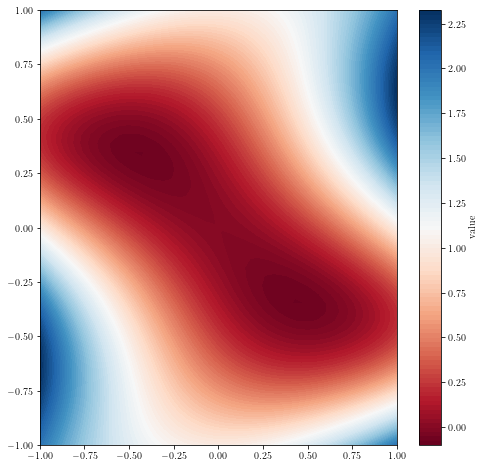

In [3]:
fig = plt.figure(figsize=(8, 8))

CS = plt.contourf(X, Y, Z, 100, cmap='RdBu')
cbar = fig.colorbar(CS, label='value')

plt.show()

In [11]:
def grad_descent(f, df, x0, Nitmax=100000):
    
    x = np.copy(x0)
    L = f(x)
    
    i = 0
    x_list = [x]
    while True:
        
        i += 1
        
        x1 = x - (1/(i+1))*df(x)
        
        error = np.linalg.norm(x1 - x)
        x = x1
        x_list.append(x)
        
        if error <= 1e-12:
            print(f"Mínimo local alcanzado, L = {f(x)}")
            print(f"Alcanzado en x = {x}")
            print(f"Número dde iteraciones = {i}")
            return x, np.array(x_list)
        
        if i > 1e10:
            break
    
    print(f"No se alcanzó convergencia, L = {f(x)}")
    return x, np.array(x_list)

In [12]:
x0 = np.array([1/2, -3/4])

xf1, xf1_list = grad_descent(f, df, x0)

Mínimo local alcanzado, L = -0.07640918938771185
Alcanzado en x = [-0.43534709  0.33633012]
Número dde iteraciones = 118125


In [13]:
x0 = np.array([3/4, 0])

xf2, xf2_list = grad_descent(f, df, x0)

Mínimo local alcanzado, L = -0.07640918938770325
Alcanzado en x = [ 0.43534704 -0.3363301 ]
Número dde iteraciones = 196605


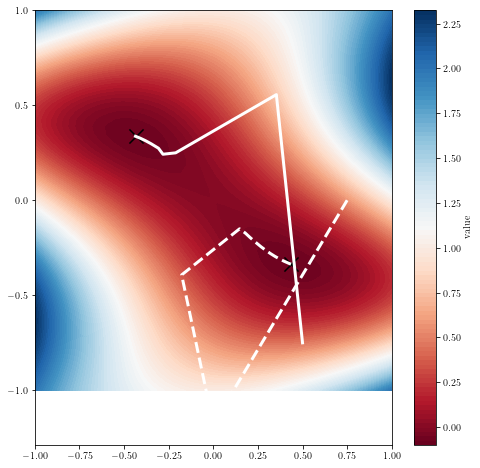

In [32]:
fig = plt.figure(figsize=(8, 8))

CS = plt.contourf(X, Y, Z, 100, cmap='RdBu')
cbar = fig.colorbar(CS, label='value')

plt.scatter(xf1[0], xf1[1], marker='x', s=200, c='k')
plt.scatter(xf2[0], xf2[1], marker='x', s=200, c='k')

#plt.quiver(xf1_list[:-1, 0], xf1_list[:-1, 1], xf1_list[1:, 0], xf1_list[1:, 1], color='white')
plt.plot(xf1_list[:,0], xf1_list[:,1], color='white', lw=3)
plt.plot(xf2_list[:,0], xf2_list[:,1], color='white', lw=3, ls='--')


plt.show()

In [11]:
def mod_grad_descent(f, df, x0, Nitmax=100000):
    
    x = np.copy(x0)
    L = f(x)
    
    i = 0
    dx = np.zeros_like(x)
    α = 0.5
    
    while True:
        
        i += 1
        
        x1 = x - (1/(i+1))*df(x) + α*dx
        
        dx = x1 - x
        
        error = np.linalg.norm(x1 - x)
        
        x = x1
        
        if error <= 1e-12:
            print(f"Mínimo local alcanzado, L = {f(x)}")
            print(f"Alcanzado en x = {x}")
            print(f"Número dde iteraciones = {i}")
            return x
        
        if i > 1e10:
            break
    
    print(f"No se alcanzó convergencia, L = {f(x)}")
    return x

In [12]:
x0 = np.array([1/2, -3/4])

xf1 = mod_grad_descent(f, df, x0)

x0 = np.array([3/4, 0])

xf2 = mod_grad_descent(f, df, x0)

Mínimo local alcanzado, L = -0.07640918938771667
Alcanzado en x = [-0.43534717  0.33633014]
Número dde iteraciones = 2706
Mínimo local alcanzado, L = -0.07640918938771667
Alcanzado en x = [ 0.43534717 -0.33633014]
Número dde iteraciones = 1202


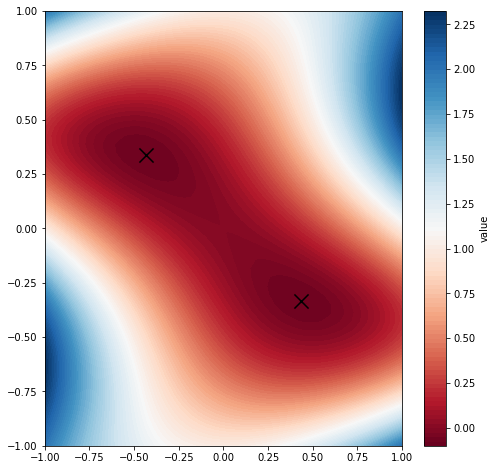

In [13]:
fig = plt.figure(figsize=(8, 8))

CS = plt.contourf(X, Y, Z, 100, cmap='RdBu')
cbar = fig.colorbar(CS, label='value')

plt.scatter(xf1[0], xf1[1], marker='x', s=200, c='k')
plt.scatter(xf2[0], xf2[1], marker='x', s=200, c='k')


plt.show()

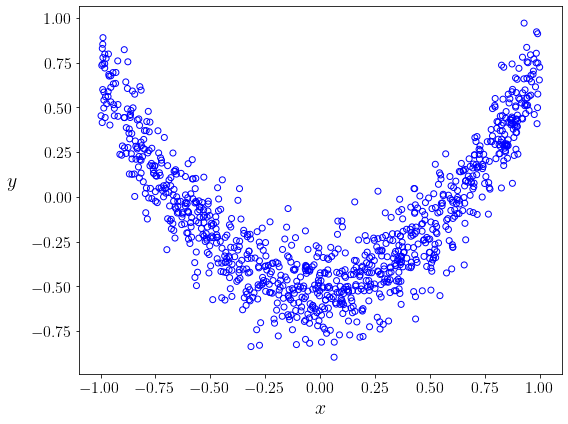

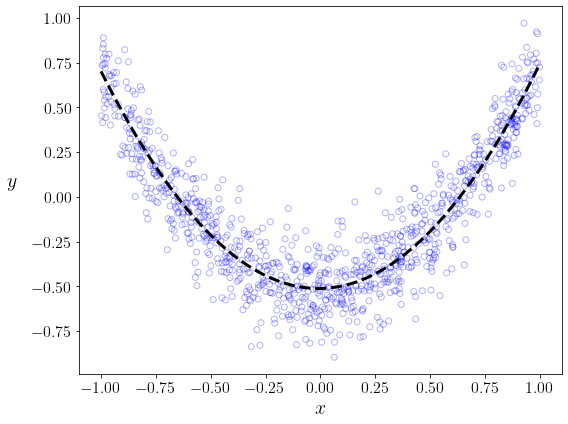

In [84]:
N = 1000

a, b, c = 1.234092, 0.020123, -0.512369

x = 2*np.random.random(N) - 1
y = a*x**2 + b*x + c + np.random.normal(size=N, loc=0, scale=0.15)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, edgecolor='blue', facecolor='None')

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20, rotation=0, labelpad=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('data_HW2.pdf', dpi=300)
plt.show()


t = np.linspace(-1, 1, num=200)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, edgecolor='blue', facecolor='None', alpha=0.3)
plt.plot(t, a*t**2 + b*t + c, color='black', lw=3, ls='--')

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20, rotation=0, labelpad=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('fitted_data.pdf', dpi=300)
plt.show()

In [86]:
np.savetxt('data_HW2.csv', X, delimiter=',', header='x,y')

In [57]:
def StochasticGD(L, dL, x, y):
    
    w = np.zeros(3)
    N = x.shape[0]
    
    random_mask = np.arange(N)
    np.random.shuffle(random_mask)
    
    Lglobal = lambda w: sum(L(w, x[k], y[k]) for k in range(N))
    
    loss_fun = [Lglobal(w)]
    
    xorder = x[random_mask]
    yorder = y[random_mask]
    
    for k in range(N):
        
        w = w - (1/(k+1))*dL(w, xorder[k], yorder[k])
        
        loss_fun.append(Lglobal(w))
        
    return w, loss_fun

In [58]:
L  = lambda w, x, y: (w[0]*x**2 + w[1]*x + w[2] - y)**2
dL = lambda w, x, y: 2*(w[0]*x**2 + w[1]*x + w[2] - y)*np.array([x**2, x, 1])

In [59]:
w_list = []
histories = []

for i in range(100):
    wf, l_fun = StochasticGD(L, dL, x, y)
    
    w_list.append(wf)
    histories.append(l_fun)
    
histories = np.array(histories)
w_array = np.array(w_list)

In [60]:
sorted_last = np.argsort(histories[:, -1])

indexes = sorted_last[:5]

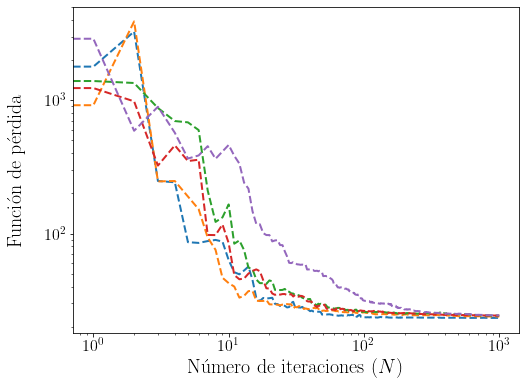

In [61]:
plt.figure(figsize=(8, 6))

for i in indexes:    
    plt.loglog(np.arange(N+1), histories[i], lw=2, ls='--')

#plt.yscale('log')
#plt.xscale('log')

plt.ylabel('Función de pérdida', size=20, labelpad=20)
plt.xlabel('Número de iteraciones $(N)$', size=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

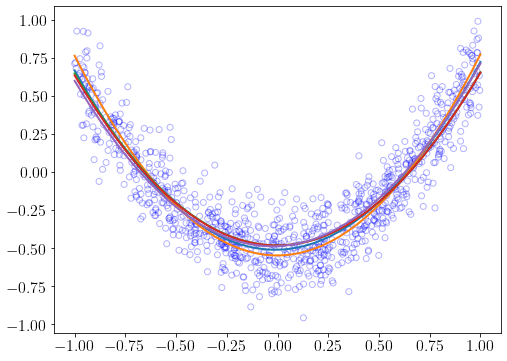

In [65]:
t = np.linspace(-1, 1)

plt.figure(figsize=(8, 6))

for j, i in enumerate(indexes):
    plt.plot(t, w_list[i][0]*t*t + w_list[i][1]*t + w_list[i][2], lw=2, color=f'C{j}')

plt.scatter(x, y, edgecolor='blue', facecolor='None', alpha=0.3)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [64]:
w_array = np.array(w_list)

w_avg = np.mean(w_array[indexes,:], axis=0)
#w_avg = np.mean(w_array, axis=0)

print(w_avg)

[ 1.18391894  0.02040346 -0.50094747]
